## Data Structures and indexing

In [1]:
import numpy as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate bin

In [2]:
%matplotlib inline

In [6]:
pd.options.display.max_rows=10
pd.options.display.float_format='{:,.2f}'.format

In [9]:
flights = pd.read_csv("./flights.csv",index_col=[0])

In [10]:
flights

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.00,2.00,830.00,11.00,UA,N14228,1545,EWR,IAH,227.00,1400,5.00,17.00
2,2013,1,1,533.00,4.00,850.00,20.00,UA,N24211,1714,LGA,IAH,227.00,1416,5.00,33.00
3,2013,1,1,542.00,2.00,923.00,33.00,AA,N619AA,1141,JFK,MIA,160.00,1089,5.00,42.00
4,2013,1,1,544.00,-1.00,"1,004.00",-18.00,B6,N804JB,725,JFK,BQN,183.00,1576,5.00,44.00
5,2013,1,1,554.00,-6.00,812.00,-25.00,DL,N668DN,461,LGA,ATL,116.00,762,5.00,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,nan,nan,nan,nan,9E,NaN,3393,JFK,DCA,nan,213,nan,nan
336773,2013,9,30,nan,nan,nan,nan,9E,NaN,3525,LGA,SYR,nan,198,nan,nan
336774,2013,9,30,nan,nan,nan,nan,MQ,N535MQ,3461,LGA,BNA,nan,764,nan,nan
336775,2013,9,30,nan,nan,nan,nan,MQ,N511MQ,3572,LGA,CLE,nan,419,nan,nan


In [14]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [16]:
flights['year']

1         2013
2         2013
3         2013
4         2013
5         2013
          ... 
336772    2013
336773    2013
336774    2013
336775    2013
336776    2013
Name: year, Length: 336776, dtype: int64

#### Both pd.DataFrame and pd.series have row labels which can be accessed with .index attribute

In [18]:
flights.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            336767, 336768, 336769, 336770, 336771, 336772, 336773, 336774,
            336775, 336776],
           dtype='int64', length=336776)

Read CSV Source : https://github.com/pandas-dev/pandas/blob/v0.21.1/pandas/io/parsers.py#L557-L709

## Indexing

#### Rules
1. uset __get_item__ (square brakcets)
2. use .loc for label based indexing 
3. use .iloc for position base indexing

In [19]:
first = flights.groupby("carrier").first()
first

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,origin,dest,air_time,distance,hour,minute
carrier,,,,,,,,,,,,,,,
9E,2013,1,1,810.00,0.00,"1,048.00",11.00,N915XJ,3538,JFK,MSP,189.00,1029,8.00,10.00
AA,2013,1,1,542.00,2.00,923.00,33.00,N619AA,1141,JFK,MIA,160.00,1089,5.00,42.00
AS,2013,1,1,724.00,-1.00,"1,020.00",-10.00,N594AS,11,EWR,SEA,338.00,2402,7.00,24.00
B6,2013,1,1,544.00,-1.00,"1,004.00",-18.00,N804JB,725,JFK,BQN,183.00,1576,5.00,44.00
DL,2013,1,1,554.00,-6.00,812.00,-25.00,N668DN,461,LGA,ATL,116.00,762,5.00,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UA,2013,1,1,517.00,2.00,830.00,11.00,N14228,1545,EWR,IAH,227.00,1400,5.00,17.00
US,2013,1,1,622.00,-8.00,"1,017.00",3.00,N807AW,245,EWR,PHX,342.00,2133,6.00,22.00
VX,2013,1,1,658.00,-2.00,"1,027.00",2.00,N627VA,399,JFK,LAX,361.00,2475,6.00,58.00


## 1. __get_item__  

In [20]:
first[["dep_delay","arr_delay"]]

,dep_delay,arr_delay
carrier,,
9E,0.00,11.00
AA,2.00,33.00
AS,-1.00,-10.00
B6,-1.00,-18.00
DL,-6.00,-25.00
...,...,...
UA,2.00,11.00
US,-8.00,3.00
VX,-2.00,2.00


In [21]:
cols = ["dep_delay","arr_delay"]
first[cols]

,dep_delay,arr_delay
carrier,,
9E,0.00,11.00
AA,2.00,33.00
AS,-1.00,-10.00
B6,-1.00,-18.00
DL,-6.00,-25.00
...,...,...
UA,2.00,11.00
US,-8.00,3.00
VX,-2.00,2.00


In [22]:
x = pd.DataFrame({"a":[1,2,3]})
x

,a
0,1
1,2
2,3


In [23]:
x.wrong = [3,4,5]

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [24]:
x

,a
0,1
1,2
2,3


In [25]:
x["right"]=[1,2,3]

In [26]:
x

,a,right
0,1,1
1,2,2
2,3,3


## 2 Label based indexing 

In [29]:
#indexing with rows
cols = ["AA","DL","US","WN"]
first.loc[cols]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,origin,dest,air_time,distance,hour,minute
carrier,,,,,,,,,,,,,,,
AA,2013,1,1,542.00,2.00,923.00,33.00,N619AA,1141,JFK,MIA,160.00,1089,5.00,42.00
DL,2013,1,1,554.00,-6.00,812.00,-25.00,N668DN,461,LGA,ATL,116.00,762,5.00,54.00
US,2013,1,1,622.00,-8.00,"1,017.00",3.00,N807AW,245,EWR,PHX,342.00,2133,6.00,22.00
WN,2013,1,1,629.00,-1.00,721.00,-19.00,N273WN,4646,LGA,BWI,40.00,185,6.00,29.00


In [32]:
#indexing with rows and columns
first.loc[cols,["dep_time","arr_time"]]

,dep_time,arr_time
carrier,,
AA,542.00,923.00
DL,554.00,812.00
US,622.00,"1,017.00"
WN,629.00,721.00


## Boolean indexing 

In [35]:
origin_counts = flights.dest.value_counts()
origin_counts

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
       ...  
HDN       15
SBN       10
ANC        8
LEX        1
LGA        1
Name: dest, Length: 105, dtype: int64

In [36]:
top5 = origin_counts.index[:5]
top5

Index(['ORD', 'ATL', 'LAX', 'BOS', 'MCO'], dtype='object')

In [37]:
mask = flights.dest.isin(top5)
mask

1         False
2         False
3         False
4         False
5          True
          ...  
336772    False
336773    False
336774    False
336775    False
336776    False
Name: dest, Length: 336776, dtype: bool

In [38]:
flights.loc[mask,['origin','dest']]

,origin,dest
5,LGA,ATL
6,EWR,ORD
9,JFK,MCO
10,LGA,ORD
13,JFK,LAX
...,...,...
336745,JFK,LAX
336752,JFK,LAX
336756,EWR,BOS
336764,JFK,MCO


### Boolean indexing can be usefull becasue so many operations can produce an array of booleans
1. Null checker (.isnull(), .notnull())
2. container checks (.isin())
3. boolean aggrgations (.any(),.all())
4. comparisons(.gt(),.lt())

In [45]:
flights[flights.dep_time.isnull()]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
839,2013,1,1,nan,nan,nan,nan,EV,N18120,4308,EWR,RDU,nan,416,nan,nan
840,2013,1,1,nan,nan,nan,nan,AA,N3EHAA,791,LGA,DFW,nan,1389,nan,nan
841,2013,1,1,nan,nan,nan,nan,AA,N3EVAA,1925,LGA,MIA,nan,1096,nan,nan
842,2013,1,1,nan,nan,nan,nan,B6,N618JB,125,JFK,FLL,nan,1069,nan,nan
1778,2013,1,2,nan,nan,nan,nan,EV,N10575,4352,EWR,CVG,nan,569,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,nan,nan,nan,nan,9E,NaN,3393,JFK,DCA,nan,213,nan,nan
336773,2013,9,30,nan,nan,nan,nan,9E,NaN,3525,LGA,SYR,nan,198,nan,nan
336774,2013,9,30,nan,nan,nan,nan,MQ,N535MQ,3461,LGA,BNA,nan,764,nan,nan
336775,2013,9,30,nan,nan,nan,nan,MQ,N511MQ,3572,LGA,CLE,nan,419,nan,nan


In [51]:
flights[flights["distance"] >1000]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.00,2.00,830.00,11.00,UA,N14228,1545,EWR,IAH,227.00,1400,5.00,17.00
2,2013,1,1,533.00,4.00,850.00,20.00,UA,N24211,1714,LGA,IAH,227.00,1416,5.00,33.00
3,2013,1,1,542.00,2.00,923.00,33.00,AA,N619AA,1141,JFK,MIA,160.00,1089,5.00,42.00
4,2013,1,1,544.00,-1.00,"1,004.00",-18.00,B6,N804JB,725,JFK,BQN,183.00,1576,5.00,44.00
7,2013,1,1,555.00,-5.00,913.00,19.00,B6,N516JB,507,EWR,FLL,158.00,1065,5.00,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336752,2013,9,30,"2,140.00",0.00,10.00,-30.00,AA,N335AA,185,JFK,LAX,298.00,2475,21.00,40.00
336754,2013,9,30,"2,145.00",0.00,115.00,-25.00,B6,N633JB,1103,JFK,SJU,192.00,1598,21.00,45.00
336755,2013,9,30,"2,147.00",10.00,30.00,3.00,B6,N627JB,1371,LGA,FLL,139.00,1076,21.00,47.00
336763,2013,9,30,"2,233.00",80.00,112.00,42.00,UA,N578UA,471,EWR,SFO,318.00,2565,22.00,33.00


### "Flights before 6 AM or aftetr 8 AM"

In [61]:
flights[(flights["arr_time"]<6.00) | (flights["arr_time"]>8.00)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.00,2.00,830.00,11.00,UA,N14228,1545,EWR,IAH,227.00,1400,5.00,17.00
2,2013,1,1,533.00,4.00,850.00,20.00,UA,N24211,1714,LGA,IAH,227.00,1416,5.00,33.00
3,2013,1,1,542.00,2.00,923.00,33.00,AA,N619AA,1141,JFK,MIA,160.00,1089,5.00,42.00
4,2013,1,1,544.00,-1.00,"1,004.00",-18.00,B6,N804JB,725,JFK,BQN,183.00,1576,5.00,44.00
5,2013,1,1,554.00,-6.00,812.00,-25.00,DL,N668DN,461,LGA,ATL,116.00,762,5.00,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336766,2013,9,30,"2,240.00",-5.00,"2,334.00",-17.00,B6,N354JB,1816,JFK,SYR,41.00,209,22.00,40.00
336767,2013,9,30,"2,240.00",-10.00,"2,347.00",-20.00,B6,N281JB,2002,JFK,BUF,52.00,301,22.00,40.00
336768,2013,9,30,"2,241.00",-5.00,"2,345.00",-16.00,B6,N346JB,486,JFK,ROC,47.00,264,22.00,41.00
336769,2013,9,30,"2,307.00",12.00,"2,359.00",1.00,B6,N565JB,718,JFK,BOS,33.00,187,23.00,7.00


### Alignments and operators
1. Workng with multiple pandas object

In [116]:
data = pd.DataFrame({"DATE":['2019-11-01','2019-11-02','2019-11-03','2019-10-01','2019-09-01'],"GDP":[1,2,3,4,5]})
data['DATE'].astype("datetime64[ns]")

0   2019-11-01
1   2019-11-02
2   2019-11-03
3   2019-10-01
4   2019-09-01
Name: DATE, dtype: datetime64[ns]

In [117]:
data=data.set_index('DATE')


In [118]:
data1 = pd.DataFrame({"DATE":['2019-11-01','2019-10-01','2019-09-01'],"GDP":[0.2,0.2,0.4]})
data1=data1.set_index('DATE')

In [119]:
data1

,GDP
DATE,
2019-11-01,0.20
2019-10-01,0.20
2019-09-01,0.40


In [120]:
data/data1

,GDP
DATE,
2019-09-01,12.50
2019-10-01,20.00
2019-11-01,5.00
2019-11-02,nan
2019-11-03,nan


### Explicit alignment

In [121]:
full_idx = data.index.union(data1.index)
full_idx

Index(['2019-09-01', '2019-10-01', '2019-11-01', '2019-11-02', '2019-11-03'], dtype='object', name='DATE')

In [122]:
data.reindex(full_idx)

,GDP
DATE,
2019-09-01,5
2019-10-01,4
2019-11-01,1
2019-11-02,2
2019-11-03,3


In [123]:
data.reindex(full_idx) / data1.reindex(full_idx)

,GDP
DATE,
2019-09-01,12.50
2019-10-01,20.00
2019-11-01,5.00
2019-11-02,nan
2019-11-03,nan


In [125]:
data.index

Index(['2019-11-01', '2019-11-02', '2019-11-03', '2019-10-01', '2019-09-01'], dtype='object', name='DATE')

### detecting missing values
1. pd.isna(). df.isna()
2. pd.notna() df.notana()

In [126]:
data.isna()

,GDP
DATE,
2019-11-01,False
2019-11-02,False
2019-11-03,False
2019-10-01,False
2019-09-01,False


In [127]:
data.notna()

,GDP
DATE,
2019-11-01,True
2019-11-02,True
2019-11-03,True
2019-10-01,True
2019-09-01,True


In [130]:
#Pandas
pd.isna(data)

,GDP
DATE,
2019-11-01,False
2019-11-02,False
2019-11-03,False
2019-10-01,False
2019-09-01,False


In [131]:
data.isna().sum()

GDP    0
dtype: int64

In [132]:
data.dropna()

,GDP
DATE,
2019-11-01,1
2019-11-02,2
2019-11-03,3
2019-10-01,4
2019-09-01,5


In [133]:
data.dropna(axis='index',how="all")

,GDP
DATE,
2019-11-01,1
2019-11-02,2
2019-11-03,3
2019-10-01,4
2019-09-01,5


### Group by

In [135]:
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.00,2.00,830.00,11.00,UA,N14228,1545,EWR,IAH,227.00,1400,5.00,17.00
2,2013,1,1,533.00,4.00,850.00,20.00,UA,N24211,1714,LGA,IAH,227.00,1416,5.00,33.00
3,2013,1,1,542.00,2.00,923.00,33.00,AA,N619AA,1141,JFK,MIA,160.00,1089,5.00,42.00
4,2013,1,1,544.00,-1.00,"1,004.00",-18.00,B6,N804JB,725,JFK,BQN,183.00,1576,5.00,44.00
5,2013,1,1,554.00,-6.00,812.00,-25.00,DL,N668DN,461,LGA,ATL,116.00,762,5.00,54.00


In [141]:
flights.groupby("carrier")["distance"].agg("mean")

carrier
9E     530.24
AA   1,340.24
AS   2,402.00
B6   1,068.62
DL   1,236.90
       ...   
UA   1,529.11
US     553.46
VX   2,499.48
WN     996.27
YV     375.03
Name: distance, Length: 16, dtype: float64

In [142]:
#groupby multi indices

In [154]:
flights.groupby(["carrier","flight"])["distance","hour"].agg(["mean","sum","min"])

distance              hour             
                   mean    sum  min  mean    sum   min
carrier flight                                        
9E      2900     765.00  45135  765 15.36 906.00 15.00
        2901     187.00  10285  187  8.27 455.00  8.00
        2902     187.00  10285  187 11.58 614.00 11.00
        2903     357.68  20030  187 14.73 810.00 14.00
        2904     203.95  11625  187 16.36 900.00 16.00
...                 ...    ...  ...   ...    ...   ...
YV      3778     229.00    687  229 19.00  57.00 19.00
        3788     229.00   5267  229 15.91 366.00 15.00
        3790     229.00   2061  229 16.14 113.00 16.00
        3791     229.00   3435  229 16.14 226.00 15.00
        3799     229.00    229  229 12.00  12.00 12.00

[5725 rows x 6 columns]

In [149]:
flights.tailnum.str?

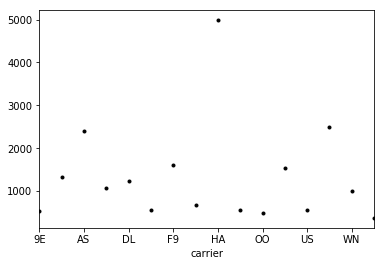

In [152]:
flights.groupby("carrier")["distance"].agg("mean").plot(style="k.")

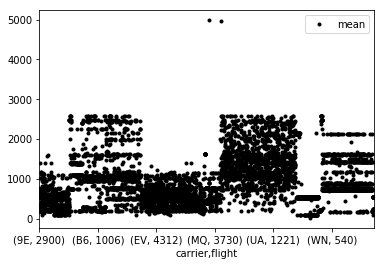

In [159]:
flights.groupby(["carrier","flight"])["distance"].agg(["mean"]).plot(style="k.")

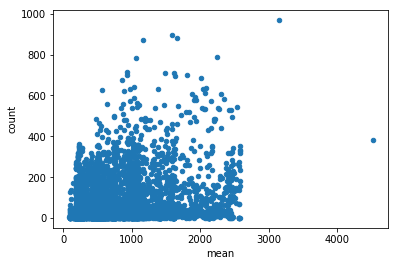

In [165]:
(flights
 .groupby("flight")["distance"]
 .agg(["mean","count"])
 .plot
 .scatter(x="mean",y="count"))

## Tidy data 

In [166]:
pies = pd.DataFrame({
    
    "names":["a","b","c"],
    "contest1":[10,5,3],
    "contest2":[None,6,9]
    
})


In [167]:
pies

,names,contest1,contest2
0,a,10,nan
1,b,5,6.00
2,c,3,9.00


In [169]:
#melt
pd.melt(pies)
#Not what we want

,variable,value
0,names,a
1,names,b
2,names,c
3,contest1,10
4,contest1,5
5,contest1,3
6,contest2,NaN
7,contest2,6.00
8,contest2,9.00


In [170]:
pd.melt(pies,id_vars="names")

,names,variable,value
0,a,contest1,10.00
1,b,contest1,5.00
2,c,contest1,3.00
3,a,contest2,nan
4,b,contest2,6.00
5,c,contest2,9.00


In [173]:
long=pd.melt(pies,id_vars="names",var_name="contest",value_name="pies").dropna()

In [174]:
long

,names,contest,pies
0,a,contest1,10.00
1,b,contest1,5.00
2,c,contest1,3.00
4,b,contest2,6.00
5,c,contest2,9.00


In [176]:
long["contest"]=long.contest.str.extract(r'([0-9]+)',expand=False)

In [177]:
long

,names,contest,pies
0,a,1,10.00
1,b,1,5.00
2,c,1,3.00
4,b,2,6.00
5,c,2,9.00


### getting back to original table

In [180]:
long.pivot(index="names",columns="contest")

pies     
contest     1    2
names             
a       10.00  nan
b        5.00 6.00
c        3.00 9.00

In [181]:
long.pivot(index="names",columns="contest").stack()

pies
names contest      
a     1       10.00
b     1        5.00
      2        6.00
c     1        3.00
      2        9.00

In [183]:
#Tidy data 
flights

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.00,2.00,830.00,11.00,UA,N14228,1545,EWR,IAH,227.00,1400,5.00,17.00
2,2013,1,1,533.00,4.00,850.00,20.00,UA,N24211,1714,LGA,IAH,227.00,1416,5.00,33.00
3,2013,1,1,542.00,2.00,923.00,33.00,AA,N619AA,1141,JFK,MIA,160.00,1089,5.00,42.00
4,2013,1,1,544.00,-1.00,"1,004.00",-18.00,B6,N804JB,725,JFK,BQN,183.00,1576,5.00,44.00
5,2013,1,1,554.00,-6.00,812.00,-25.00,DL,N668DN,461,LGA,ATL,116.00,762,5.00,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,nan,nan,nan,nan,9E,NaN,3393,JFK,DCA,nan,213,nan,nan
336773,2013,9,30,nan,nan,nan,nan,9E,NaN,3525,LGA,SYR,nan,198,nan,nan
336774,2013,9,30,nan,nan,nan,nan,MQ,N535MQ,3461,LGA,BNA,nan,764,nan,nan
336775,2013,9,30,nan,nan,nan,nan,MQ,N511MQ,3572,LGA,CLE,nan,419,nan,nan


In [188]:
flights.melt(id_vars=["carrier","flight"],value_vars=["distance","hour"])

,carrier,flight,variable,value
0,UA,1545,distance,"1,400.00"
1,UA,1714,distance,"1,416.00"
2,AA,1141,distance,"1,089.00"
3,B6,725,distance,"1,576.00"
4,DL,461,distance,762.00
...,...,...,...,...
673547,9E,3393,hour,nan
673548,9E,3525,hour,nan
673549,MQ,3461,hour,nan
673550,MQ,3572,hour,nan


In [190]:
import numpy as np

In [219]:
a=(np.random.random(10)*100)
a

array([18.58717961, 50.37046572, 54.6396779 , 32.64803381, 74.93190225,
       10.0323592 , 61.83757531, 67.95425267, 26.98355523, 16.49756469])

In [196]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [220]:
a[np.random.permutation(10).argsort()]

array([10.0323592 , 18.58717961, 74.93190225, 54.6396779 , 50.37046572,
       32.64803381, 61.83757531, 16.49756469, 26.98355523, 67.95425267])

In [222]:
pd.__version__

'0.24.2'